In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# **LAB 3**

In [2]:
import numpy as np
import os
import json
directories_with_labels = [("/content/drive/MyDrive/Phương pháp học máy trong an toàn thông tin - NT522.P21.ANTT/LAB/Lab 3/Resources/DA Logs Benign", 0),
                           ("/content/drive/MyDrive/Phương pháp học máy trong an toàn thông tin - NT522.P21.ANTT/LAB/Lab 3/Resources/DA Logs Malware", 1)]

In [3]:
def get_API_class_method_type_from_log(log):
  """Parses out API calls from behavioral logs."""
  API_data_sequence = []
  with open(log) as log_file:
    json_log = json.load(log_file) # Parse log file's content and handle it as JSON format. <`load` is applied for *text files* or binary files>
    api_calls_array = "[" + json_log["api_calls"] + "]" # Get value from 'api_calls' property from JSON Object. It is also a JSON Object.
    api_calls = json.loads(api_calls_array) # Parse object above and handle it as JSON format. <`loads` supports a str, bytes or bytearray instance>
    for api_call in api_calls:
      data = api_call["class"] + ":" + api_call["method"] + ":" + api_call["type"] # Only do care of values of `class`, `method` and `type` properties extracted dynamically
      API_data_sequence.append(data)
    return API_data_sequence

In [4]:
data_corpus = []
labels = []

In [5]:
for directory, label in directories_with_labels:
  logs = os.listdir(directory)
  for log_path in logs:
    file_path = directory + "/" + log_path
    try:
      data_corpus.append(get_API_class_method_type_from_log(file_path))
      labels.append(label)
    except:
      pass
# print(data_corpus[0])

In [6]:
from sklearn.model_selection import train_test_split

corpus_train, corpus_test, y_train, y_test = train_test_split(
  data_corpus,
  labels,
  test_size=0.2,
  random_state=11
)

In [7]:
import collections
from nltk import ngrams
import numpy as np

In [8]:
def read_file(file_path):
  """Reads in the binary sequence of a binary file."""
  with open(file_path, "rb") as binary_file:
    data = binary_file.read()
  return data

def text_to_Ngrams(text, n):
  """Produces a list of N-grams from a text."""
  Ngrams = ngrams(text, n)
  return list(Ngrams)

def get_Ngram_counts(text, N):
  """Get a frequency count of N-grams in a text."""
  Ngrams = text_to_Ngrams(text, N)
  return collections.Counter(Ngrams)

In [9]:
N_gram = 4
total_Ngram_count = collections.Counter([])
for file in corpus_train:
  total_Ngram_count += get_Ngram_counts(file, N_gram)

In [10]:
K1 = 3000
K1_most_frequent_Ngrams = total_Ngram_count.most_common(K1)
K1_most_frequent_Ngrams_list = [x[0] for x in K1_most_frequent_Ngrams]

In [11]:
def featurize_sample(file, Ngrams_list):
  """Takes a sample and produces a feature vector.
  The features are the counts of the K1 N-grams we've selected.
  """
  K1 = len(Ngrams_list)
  feature_vector = K1 * [0]
  fileNgrams = get_Ngram_counts(file, N_gram)
  for i in range(K1):
    feature_vector[i] = fileNgrams[Ngrams_list[i]]
  return feature_vector

# The output vector is an array whose each value is the most common 'N-grams' of that file,
# chosen from `K1_most_frequent_Ngrams_list`  as `Ngrams_list` parameters that is extracted by whole dataset before


In [12]:
X_train = []
for sample in corpus_train:
  X_train.append(featurize_sample(sample, K1_most_frequent_Ngrams_list))
X_train = np.asarray(X_train)

X_test = []
for sample in corpus_test:
  X_test.append(featurize_sample(sample, K1_most_frequent_Ngrams_list))
X_test = np.asarray(X_test)

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [14]:
K2 = 500
mi_pipeline = Pipeline(
  [
    ("mutual_information", SelectKBest(mutual_info_classif, k=K2)),
   # mutual_info_classif: Estimate mutual information for a discrete target variable
   # SelectKBest: Select features according to the k highest scores. k: Number of top features to select, in this case is `K2`
    ("xgb", XGBClassifier()), # Use 'XGBoost' algorithm
  ]
)

In [15]:
mi_pipeline.fit(X_train, y_train)

Pipeline(steps=[('mutual_information',
                 SelectKBest(k=500,
                             score_func=<function mutual_info_classif at 0x7f8a63079d00>)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gam..._policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [16]:
print("Training accuracy:")
print(mi_pipeline.score(X_train, y_train))
print("Testing accuracy:")
print(mi_pipeline.score(X_test, y_test))

Training accuracy:
0.9161337924249877
Testing accuracy:
0.8357915437561455


# **LAB 6**

- Thực hiện tải UPX tại đường dẫn: https://github.com/upx/upx/releases/tag/v5.0.0

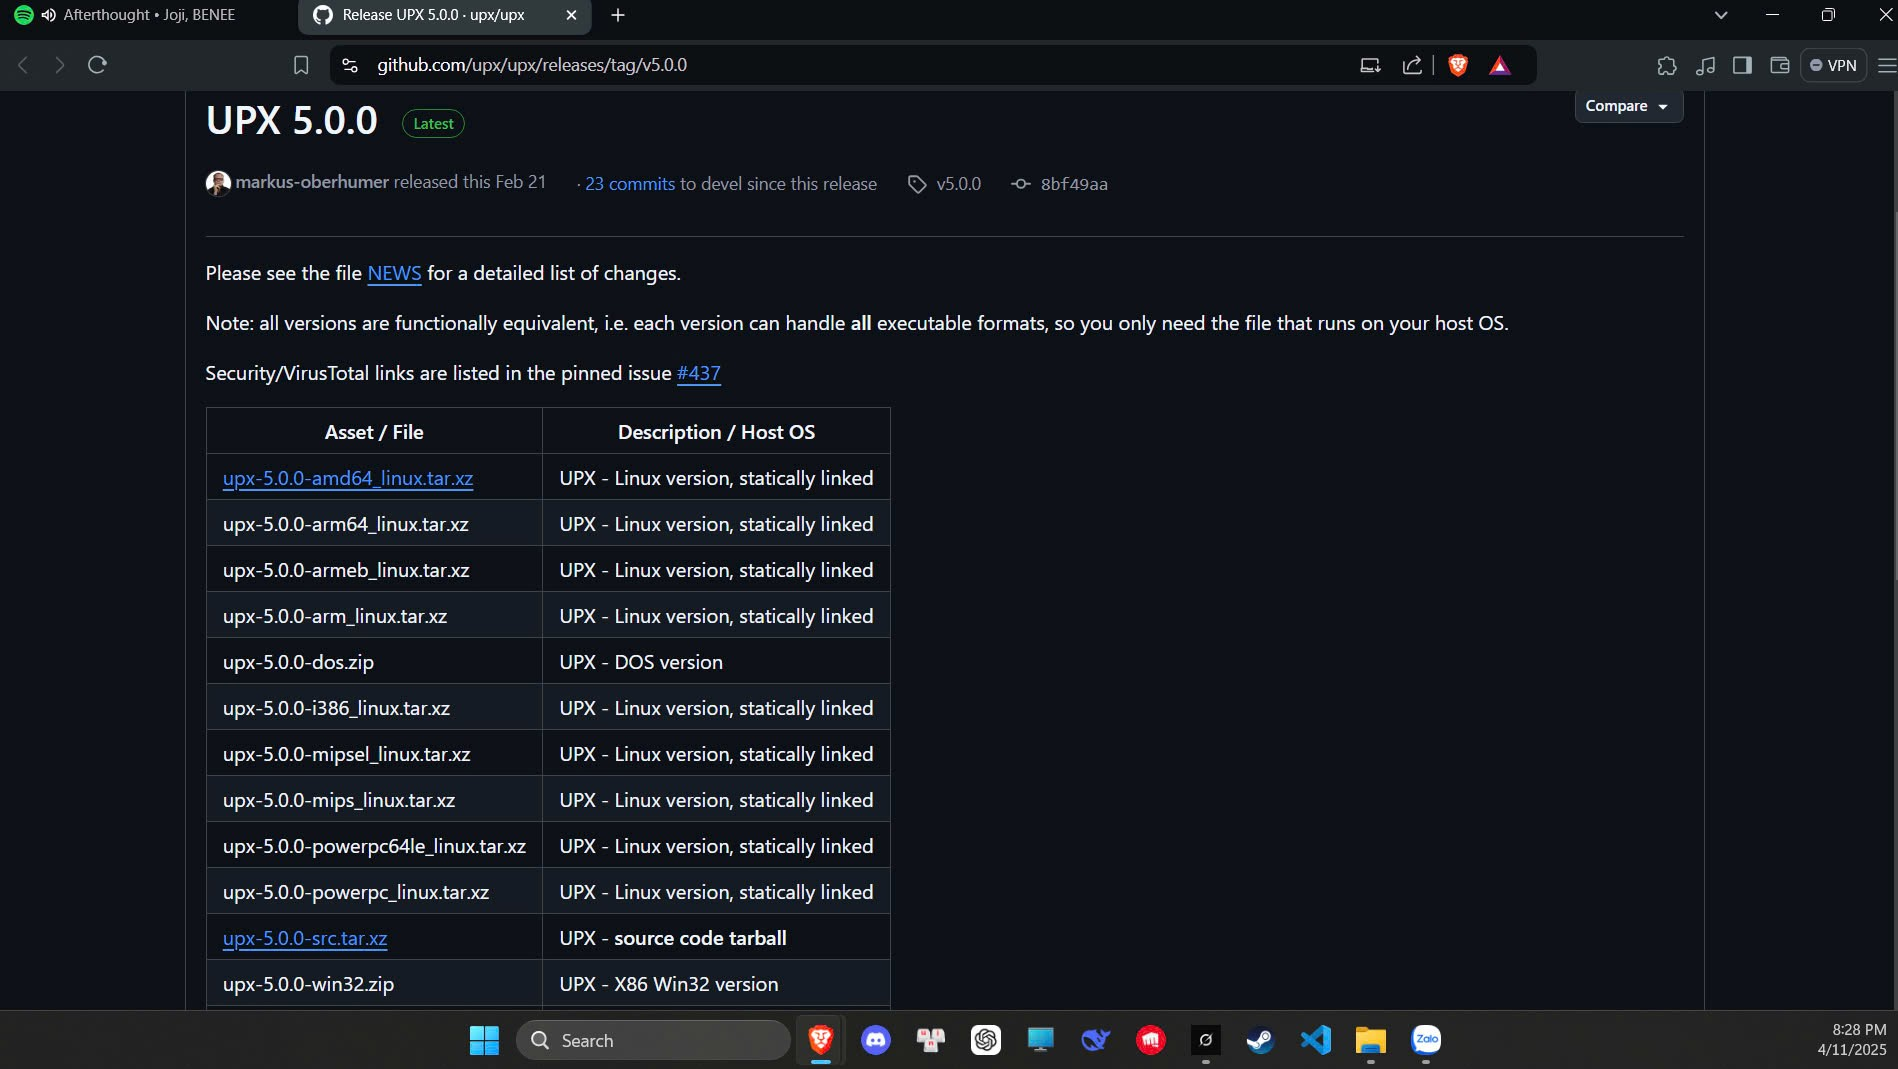


- Sau khi tải về thực hiện giải nén rồi đưa folder Benign PE Sample UPX vào trong thư mục giải nén để thực hiện đóng gói các tệp tin

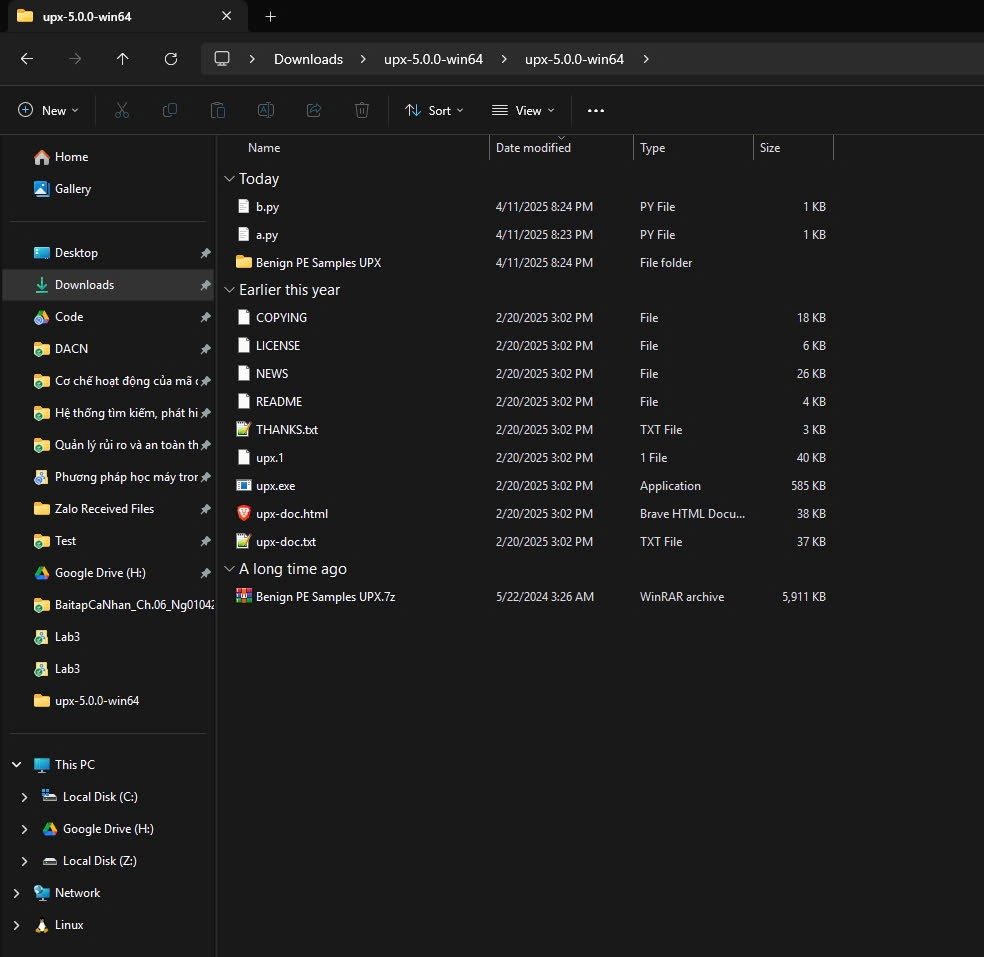

- Dùng đoạn code sau để thực hiện tự động đón gói các tập trung trong folder

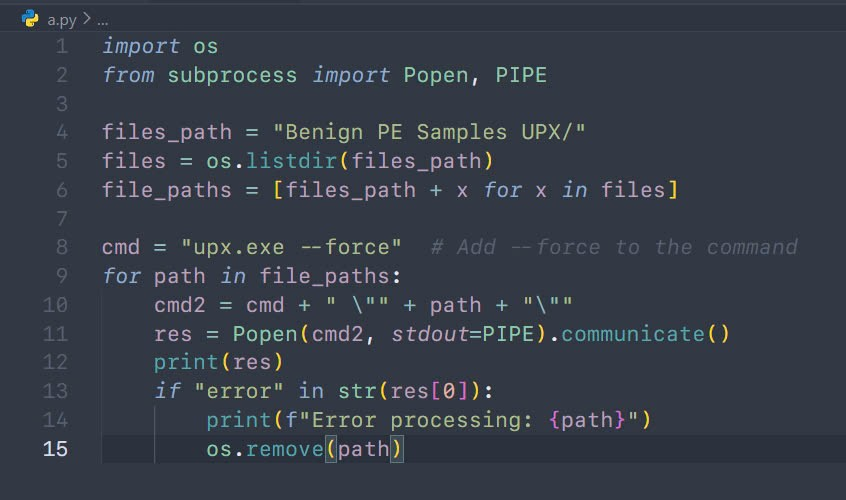

- Kết quả:

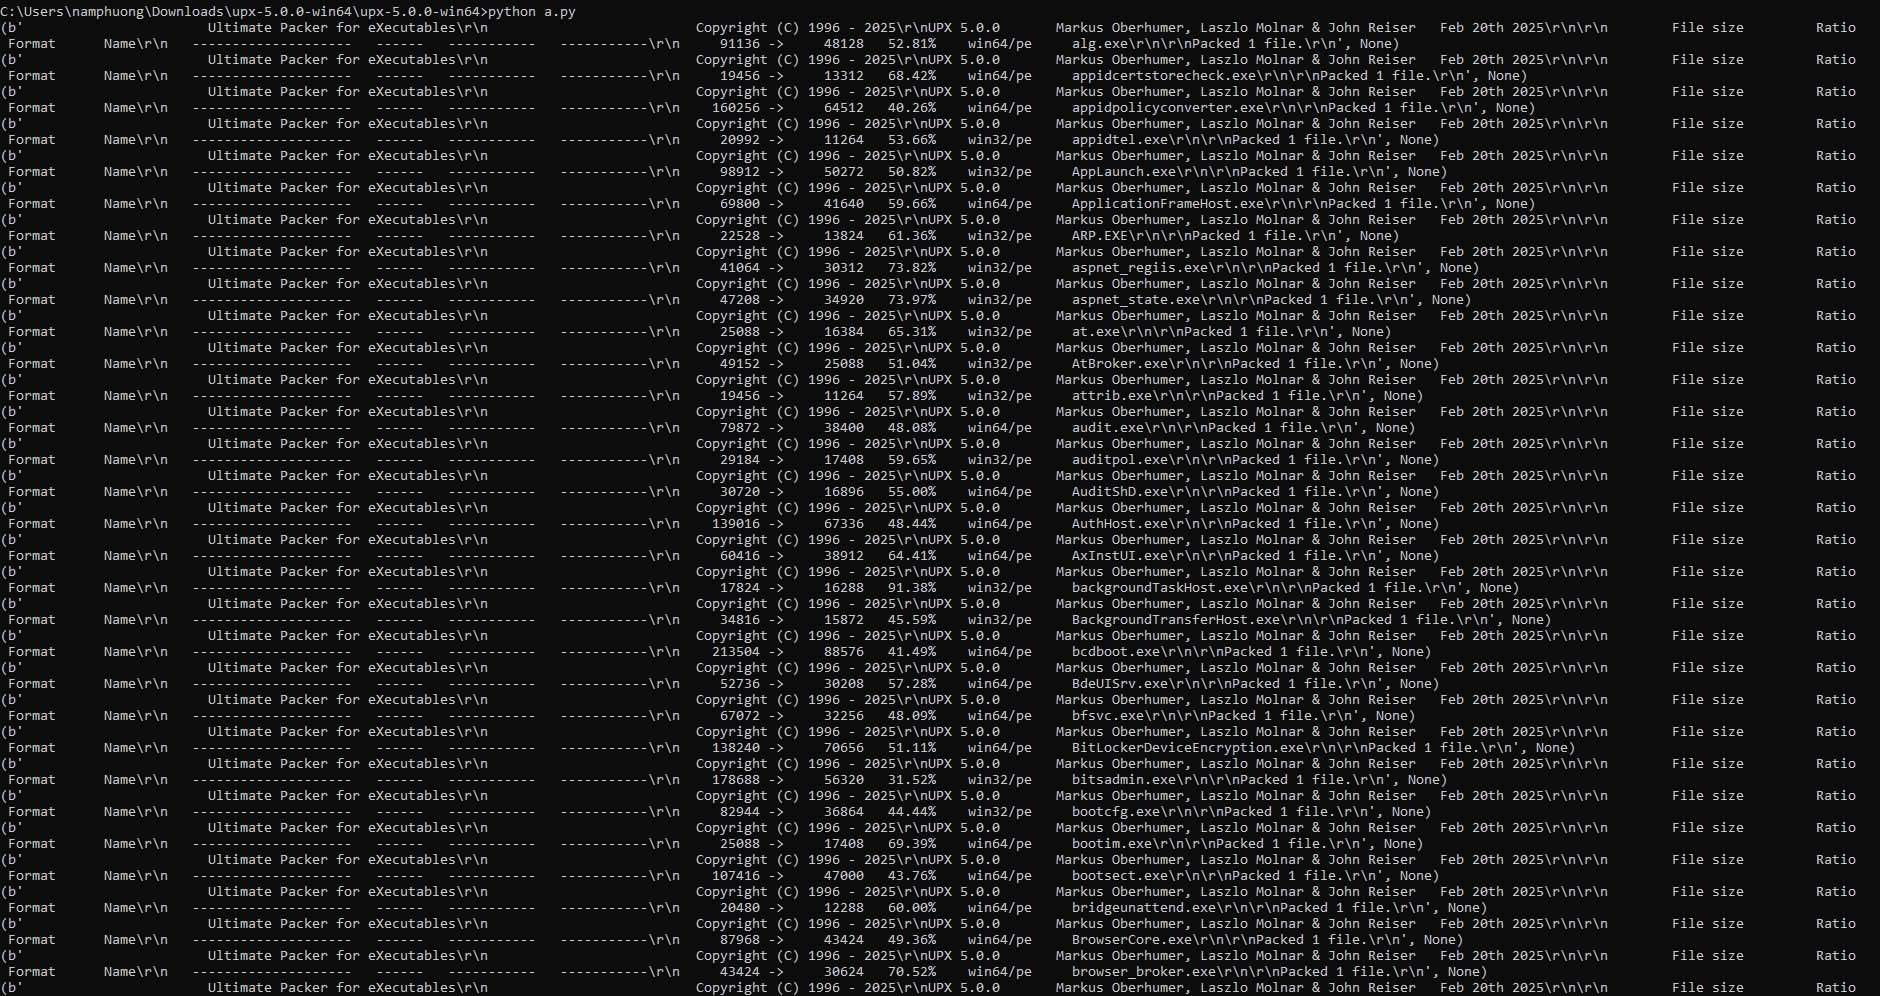